In [2]:
# ============================================================================
# MULTI-MODEL COMPARISON FOR EMISSIONS PREDICTION
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')



In [3]:
df_merged = pd.read_csv('emissions_gdp_population_merged.csv', index_col=0)

In [4]:
df_merged.head()

,Country,Year,Total_Emissions,GDP,Population,GDP_growth_1yr,Population_growth_1yr,GDP_per_capita,Emissions_lag_1,Emissions_lag_2,Emissions_lag_3,Emissions_growth_1yr,Emissions_per_capita,Emissions_intensity
ISO,,,,,,,,,,,,,,
AGO,Angola,1993,72.68,5.768720e+09,12827135.0,-0.305627,403423.0,449.727895,69.75,68.92,68.49,0.042007,0.000006,1.259898e-08
AGO,Angola,1994,75.64,4.438321e+09,13249764.0,-0.230623,422629.0,334.973590,72.68,69.75,68.92,0.040726,0.000006,1.704248e-08
AGO,Angola,1995,78.78,5.538749e+09,13699778.0,0.247938,450014.0,404.294818,75.64,72.68,69.75,0.041512,0.000006,1.422343e-08
AGO,Angola,1996,81.71,7.526422e+09,14170973.0,0.358867,471195.0,531.115367,78.78,75.64,72.68,0.037192,0.000006,1.085642e-08
AGO,Angola,1997,80.81,7.648380e+09,14660413.0,0.016204,489440.0,521.702915,81.71,78.78,75.64,-0.011015,0.000006,1.056564e-08


In [5]:
# ============================================================================
# STEP 1: PREPARE DATA
# ============================================================================

# Define features and target
emission_features = [
    'GDP', 'GDP_growth_1yr', 'GDP_per_capita',
    'Population', 'Population_growth_1yr',
    'Emissions_lag_1', 'Emissions_lag_2', 'Emissions_lag_3',
    'Emissions_growth_1yr', 'Emissions_per_capita', 'Emissions_intensity'
]

target = 'Total_Emissions'

# Sort by year for time-based operations
df_sorted = df_merged.sort_values(['Year', 'ISO']).reset_index(drop=True)
X = df_sorted[emission_features].values
y = df_sorted[target].values

print(f"Features: {emission_features}")
print(f"Dataset shape: {X.shape}")


Features: ['GDP', 'GDP_growth_1yr', 'GDP_per_capita', 'Population', 'Population_growth_1yr', 'Emissions_lag_1', 'Emissions_lag_2', 'Emissions_lag_3', 'Emissions_growth_1yr', 'Emissions_per_capita', 'Emissions_intensity']
Dataset shape: (4284, 11)


In [6]:
# ============================================================================
# STEP 2: DEFINE TimeSeriesSplit
# ============================================================================

N_SPLITS = 5  # Number of folds

tscv = TimeSeriesSplit(n_splits=N_SPLITS)

print(f"\nTimeSeriesSplit Configuration:")
print(f"   Number of splits: {N_SPLITS}")

# Visualize the splits
print(f"\n   Split sizes:")
for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    train_years = df_sorted.iloc[train_idx]['Year'].unique()
    test_years = df_sorted.iloc[test_idx]['Year'].unique()
    print(f"   Fold {fold+1}: Train {len(train_idx)} samples (Years: {train_years.min()}-{train_years.max()}) | "
          f"Test {len(test_idx)} samples (Years: {test_years.min()}-{test_years.max()})")



TimeSeriesSplit Configuration:
   Number of splits: 5

   Split sizes:
   Fold 1: Train 714 samples (Years: 1993-1997) | Test 714 samples (Years: 1997-2002)
   Fold 2: Train 1428 samples (Years: 1993-2002) | Test 714 samples (Years: 2002-2006)
   Fold 3: Train 2142 samples (Years: 1993-2006) | Test 714 samples (Years: 2007-2011)
   Fold 4: Train 2856 samples (Years: 1993-2011) | Test 714 samples (Years: 2011-2016)
   Fold 5: Train 3570 samples (Years: 1993-2016) | Test 714 samples (Years: 2016-2020)



TRAINING WITH TimeSeriesSplit CROSS-VALIDATION

▶ Evaluating Linear Regression...
   R² = 0.9920 (±0.0086)
   MAE = 15.43 (±3.46)

▶ Evaluating Ridge Regression...
   R² = 0.9919 (±0.0083)
   MAE = 15.81 (±3.25)

▶ Evaluating Lasso Regression...
   R² = 0.9924 (±0.0080)
   MAE = 14.25 (±3.26)

▶ Evaluating ElasticNet...
   R² = 0.9728 (±0.0099)
   MAE = 42.87 (±3.28)

▶ Evaluating Decision Tree...
   R² = 0.9288 (±0.0927)
   MAE = 27.14 (±13.30)

▶ Evaluating Random Forest...
   R² = 0.9687 (±0.0139)
   MAE = 22.28 (±4.76)

▶ Evaluating Gradient Boosting...
   R² = 0.9661 (±0.0212)
   MAE = 20.78 (±5.64)

▶ Evaluating AdaBoost...
   R² = 0.9678 (±0.0153)
   MAE = 81.94 (±19.43)

▶ Evaluating KNN...
   R² = 0.9554 (±0.0206)
   MAE = 48.15 (±4.26)

▶ Evaluating SVR...
   R² = -0.0222 (±0.0135)
   MAE = 215.69 (±16.90)

MODEL PERFORMANCE RANKING (TimeSeriesSplit CV)
            Model   R² Mean   R² Std   MAE Mean   MAE Std  RMSE Mean  MAPE Mean (%)
 Lasso Regression  0.992367 0.008043  1

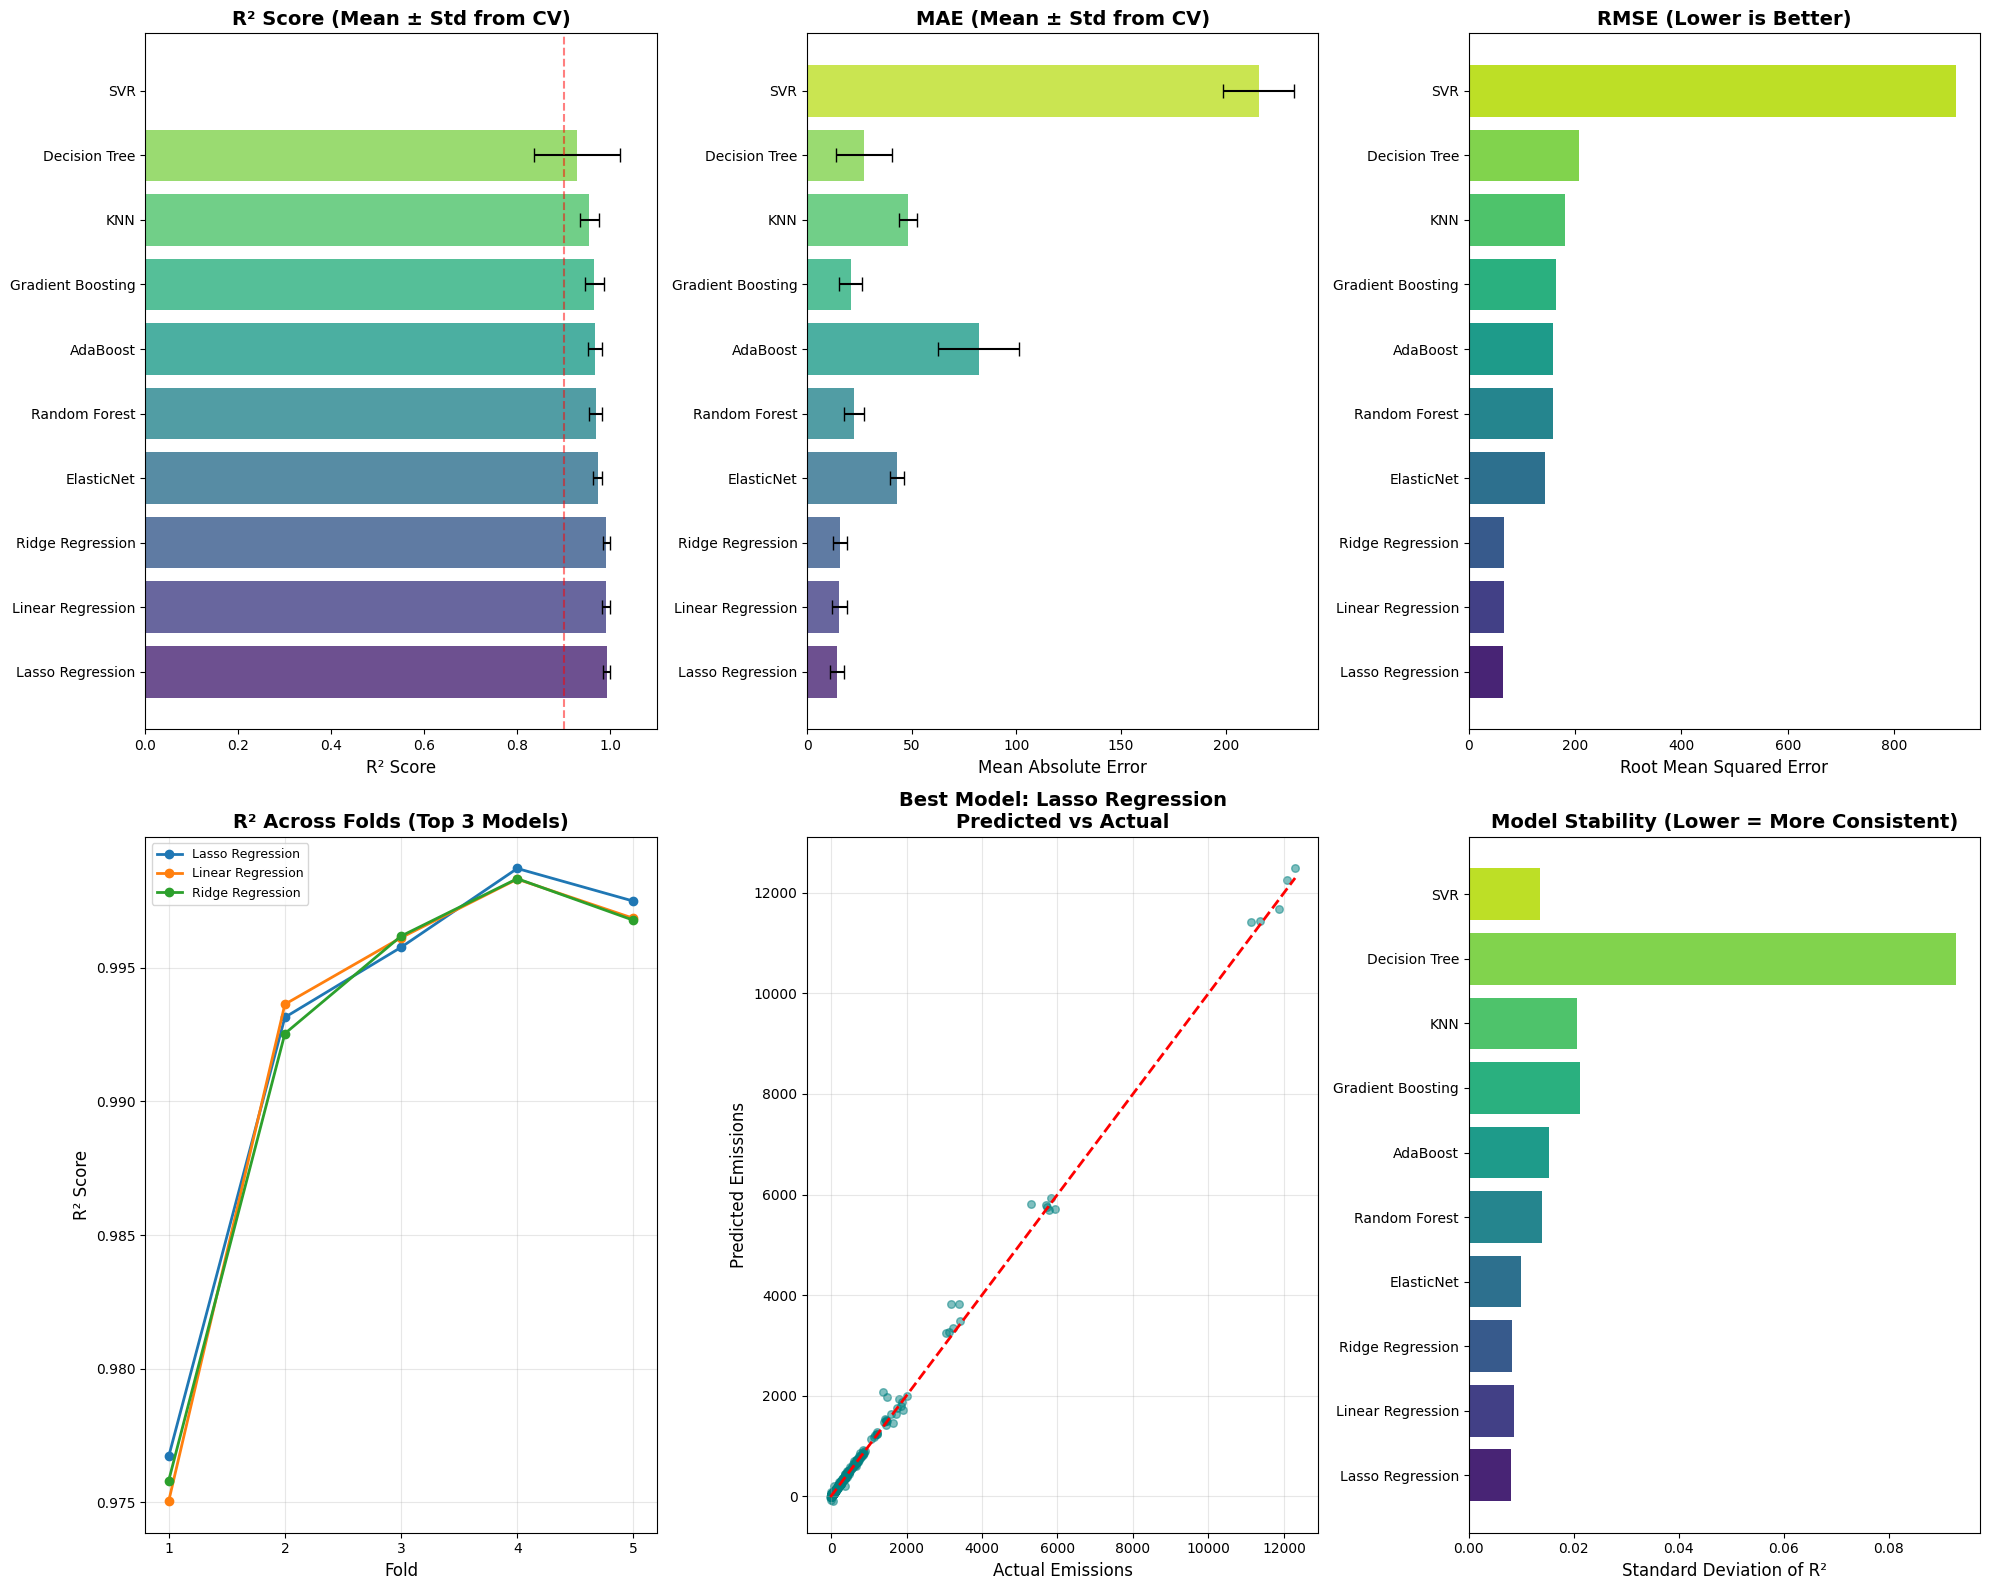

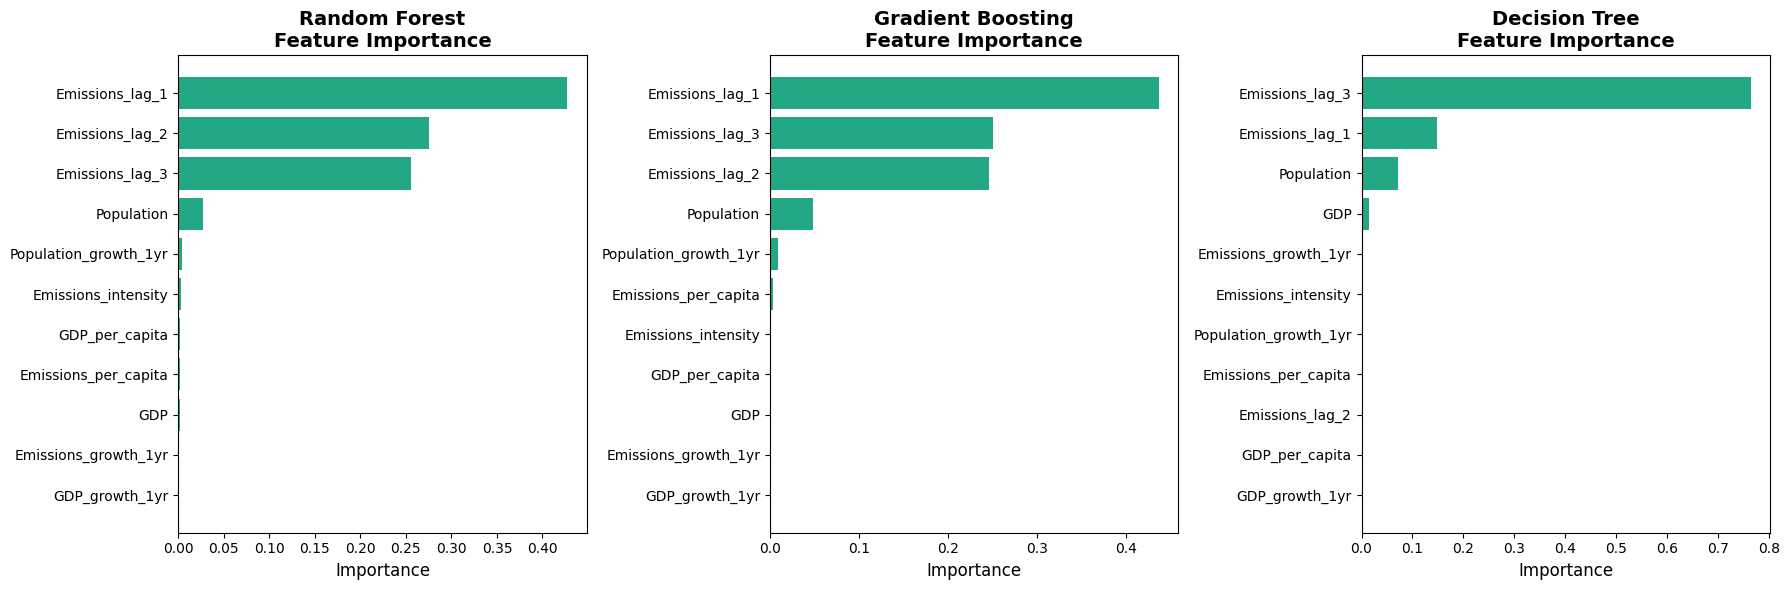

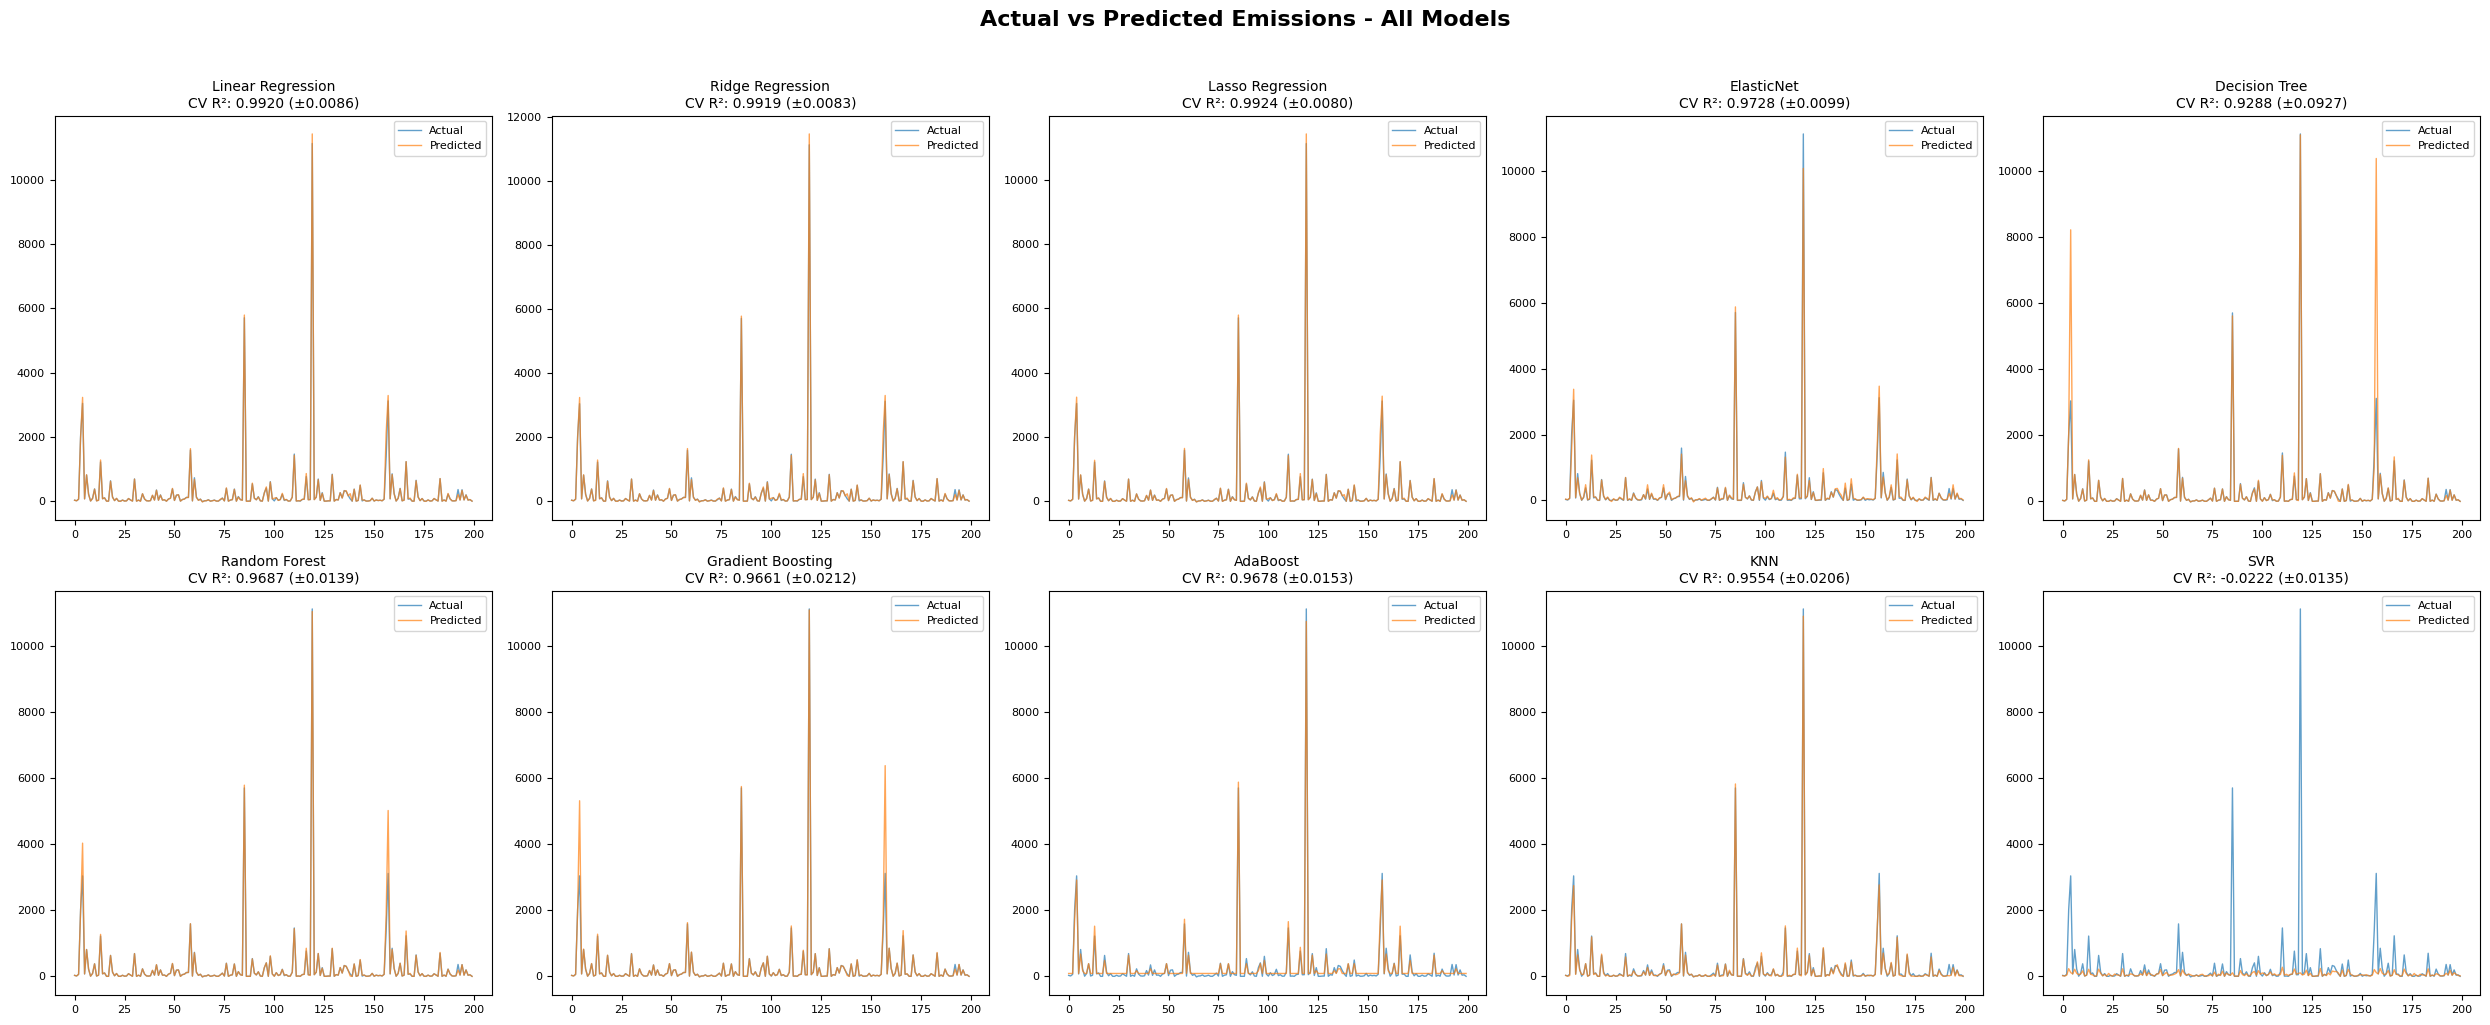


FINAL SUMMARY (TimeSeriesSplit Cross-Validation)

Best Model: Lasso Regression
   CV R² Score: 0.9924 (±0.0080)
   CV MAE: 14.25 (±3.26)
   CV RMSE: 64.24
   CV MAPE: 859.32%

Top 3 Models:
   1. Lasso Regression     R²: 0.9924 (±0.0080)
   2. Linear Regression    R²: 0.9920 (±0.0086)
   3. Ridge Regression     R²: 0.9919 (±0.0083)

Cross-Validation Details:
   Method: TimeSeriesSplit
   Number of folds: 5
   Total samples: 4284

Graphs saved:
   - emissions_timeseries_cv_comparison.png
   - emissions_feature_importance.png
   - emissions_all_models_predictions.png


In [7]:
# ============================================================================
# STEP 3: DEFINE MODELS
# ============================================================================

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf', C=1.0)
}

# ============================================================================
# STEP 4: TRAIN AND EVALUATE WITH TimeSeriesSplit
# ============================================================================

results = {}
fold_details = {}

print("\n" + "="*70)
print("TRAINING WITH TimeSeriesSplit CROSS-VALIDATION")
print("="*70)

for name, model in models.items():
    print(f"\n▶ Evaluating {name}...")
    
    fold_scores = {'MAE': [], 'RMSE': [], 'R2': [], 'MAPE': []}
    
    for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
        # Split data
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Scale features (fit on train only)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Clone model for each fold (to avoid state leakage)
        from sklearn.base import clone
        model_clone = clone(model)
        
        # Train
        model_clone.fit(X_train_scaled, y_train)
        
        # Predict
        y_pred = model_clone.predict(X_test_scaled)
        
        # Evaluate
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
        fold_scores['MAE'].append(mae)
        fold_scores['RMSE'].append(rmse)
        fold_scores['R2'].append(r2)
        fold_scores['MAPE'].append(mape)
    
    # Store average results
    results[name] = {
        'MAE_mean': np.mean(fold_scores['MAE']),
        'MAE_std': np.std(fold_scores['MAE']),
        'RMSE_mean': np.mean(fold_scores['RMSE']),
        'RMSE_std': np.std(fold_scores['RMSE']),
        'R2_mean': np.mean(fold_scores['R2']),
        'R2_std': np.std(fold_scores['R2']),
        'MAPE_mean': np.mean(fold_scores['MAPE']),
        'MAPE_std': np.std(fold_scores['MAPE']),
        'fold_scores': fold_scores
    }
    
    print(f"   R² = {results[name]['R2_mean']:.4f} (±{results[name]['R2_std']:.4f})")
    print(f"   MAE = {results[name]['MAE_mean']:,.2f} (±{results[name]['MAE_std']:,.2f})")

# ============================================================================
# STEP 5: CREATE RESULTS DATAFRAME
# ============================================================================

results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'R² Mean': [results[m]['R2_mean'] for m in results],
    'R² Std': [results[m]['R2_std'] for m in results],
    'MAE Mean': [results[m]['MAE_mean'] for m in results],
    'MAE Std': [results[m]['MAE_std'] for m in results],
    'RMSE Mean': [results[m]['RMSE_mean'] for m in results],
    'MAPE Mean (%)': [results[m]['MAPE_mean'] for m in results]
}).sort_values('R² Mean', ascending=False)

print("\n" + "="*70)
print("MODEL PERFORMANCE RANKING (TimeSeriesSplit CV)")
print("="*70)
print(results_df.to_string(index=False))

# ============================================================================
# STEP 6: TRAIN FINAL MODEL ON ALL DATA (for predictions)
# ============================================================================

print("\n" + "="*70)
print("🏆 TRAINING FINAL MODELS ON FULL DATASET")
print("="*70)

# Use 80-20 holdout for final evaluation
split_idx = int(len(X) * 0.8)
X_train_final, X_test_final = X[:split_idx], X[split_idx:]
y_train_final, y_test_final = y[:split_idx], y[split_idx:]

scaler_final = StandardScaler()
X_train_final_scaled = scaler_final.fit_transform(X_train_final)
X_test_final_scaled = scaler_final.transform(X_test_final)

# Train all models for final evaluation and store predictions
for name, model in models.items():
    model.fit(X_train_final_scaled, y_train_final)
    y_pred_final = model.predict(X_test_final_scaled)
    results[name]['predictions'] = y_pred_final
    results[name]['model'] = model

# Store test data for plots
y_test = y_test_final

best_model_name = results_df.iloc[0]['Model']
print(f"\nBest Model: {best_model_name}")
print(f"   CV R² = {results[best_model_name]['R2_mean']:.4f} (±{results[best_model_name]['R2_std']:.4f})")

# ============================================================================
# STEP 7: VISUALIZATIONS
# ============================================================================

fig = plt.figure(figsize=(20, 16))

colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(models)))
sorted_models = results_df['Model'].tolist()

# 1. R² Score with Error Bars
ax1 = plt.subplot(2, 3, 1)
r2_means = [results[m]['R2_mean'] for m in sorted_models]
r2_stds = [results[m]['R2_std'] for m in sorted_models]

y_pos = np.arange(len(sorted_models))
ax1.barh(y_pos, r2_means, xerr=r2_stds, color=colors, capsize=5, alpha=0.8)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(sorted_models)
ax1.set_xlabel('R² Score', fontsize=12)
ax1.set_title('R² Score (Mean ± Std from CV)', fontsize=14, fontweight='bold')
ax1.axvline(x=0.9, color='red', linestyle='--', alpha=0.5, label='0.9 threshold')
ax1.set_xlim([0, 1.1])

# 2. MAE with Error Bars
ax2 = plt.subplot(2, 3, 2)
mae_means = [results[m]['MAE_mean'] for m in sorted_models]
mae_stds = [results[m]['MAE_std'] for m in sorted_models]

ax2.barh(y_pos, mae_means, xerr=mae_stds, color=colors, capsize=5, alpha=0.8)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(sorted_models)
ax2.set_xlabel('Mean Absolute Error', fontsize=12)
ax2.set_title('MAE (Mean ± Std from CV)', fontsize=14, fontweight='bold')

# 3. RMSE Comparison
ax3 = plt.subplot(2, 3, 3)
rmse_means = [results[m]['RMSE_mean'] for m in sorted_models]
ax3.barh(sorted_models, rmse_means, color=colors)
ax3.set_xlabel('Root Mean Squared Error', fontsize=12)
ax3.set_title('RMSE (Lower is Better)', fontsize=14, fontweight='bold')

# 4. R² Score Across Folds (Best 3 Models)
ax4 = plt.subplot(2, 3, 4)
top3_models = results_df.head(3)['Model'].tolist()
for model_name in top3_models:
    fold_r2 = results[model_name]['fold_scores']['R2']
    ax4.plot(range(1, N_SPLITS+1), fold_r2, marker='o', linewidth=2, label=model_name)
ax4.set_xlabel('Fold', fontsize=12)
ax4.set_ylabel('R² Score', fontsize=12)
ax4.set_title('R² Across Folds (Top 3 Models)', fontsize=14, fontweight='bold')
ax4.legend(fontsize=9)
ax4.set_xticks(range(1, N_SPLITS+1))
ax4.grid(True, alpha=0.3)

# 5. Predictions vs Actual (Best Model)
ax5 = plt.subplot(2, 3, 5)
best_pred = results[best_model_name]['predictions']
ax5.scatter(y_test_final, best_pred, alpha=0.5, s=30, c='teal')
ax5.plot([y_test_final.min(), y_test_final.max()], 
         [y_test_final.min(), y_test_final.max()], 'r--', lw=2)
ax5.set_xlabel('Actual Emissions', fontsize=12)
ax5.set_ylabel('Predicted Emissions', fontsize=12)
ax5.set_title(f'Best Model: {best_model_name}\nPredicted vs Actual', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)

# 6. Stability Check (Std of R² across models)
ax6 = plt.subplot(2, 3, 6)
ax6.barh(sorted_models, r2_stds, color=colors)
ax6.set_xlabel('Standard Deviation of R²', fontsize=12)
ax6.set_title('Model Stability (Lower = More Consistent)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('emissions_timeseries_cv_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEP 8: FEATURE IMPORTANCE (Tree-based models)
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

tree_models = ['Random Forest', 'Gradient Boosting', 'Decision Tree']

for idx, model_name in enumerate(tree_models):
    importance = pd.DataFrame({
        'feature': emission_features,
        'importance': results[model_name]['model'].feature_importances_
    }).sort_values('importance', ascending=True)
    
    axes[idx].barh(importance['feature'], importance['importance'], color=plt.cm.viridis(0.6))
    axes[idx].set_xlabel('Importance', fontsize=12)
    axes[idx].set_title(f'{model_name}\nFeature Importance', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('emissions_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEP 9: INDIVIDUAL MODEL PREDICTION PLOTS
# ============================================================================

fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.flatten()

for idx, (name, data) in enumerate(results.items()):
    ax = axes[idx]
    pred = data['predictions']
    
    sample_size = min(200, len(y_test_final))
    ax.plot(range(sample_size), y_test_final[:sample_size], label='Actual', alpha=0.7, linewidth=1)
    ax.plot(range(sample_size), pred[:sample_size], label='Predicted', alpha=0.7, linewidth=1)
    ax.set_title(f'{name}\nCV R²: {data["R2_mean"]:.4f} (±{data["R2_std"]:.4f})', fontsize=10)
    ax.legend(fontsize=8)
    ax.tick_params(labelsize=8)

plt.suptitle('Actual vs Predicted Emissions - All Models', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('emissions_all_models_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEP 10: FINAL SUMMARY
# ============================================================================

print("\n" + "="*70)
print("FINAL SUMMARY (TimeSeriesSplit Cross-Validation)")
print("="*70)

print(f"\nBest Model: {best_model_name}")
print(f"   CV R² Score: {results[best_model_name]['R2_mean']:.4f} (±{results[best_model_name]['R2_std']:.4f})")
print(f"   CV MAE: {results[best_model_name]['MAE_mean']:,.2f} (±{results[best_model_name]['MAE_std']:,.2f})")
print(f"   CV RMSE: {results[best_model_name]['RMSE_mean']:,.2f}")
print(f"   CV MAPE: {results[best_model_name]['MAPE_mean']:.2f}%")

print("\nTop 3 Models:")
for i, (_, row) in enumerate(results_df.head(3).iterrows()):
    print(f"   {i+1}. {row['Model']:<20} R²: {row['R² Mean']:.4f} (±{row['R² Std']:.4f})")

print(f"\nCross-Validation Details:")
print(f"   Method: TimeSeriesSplit")
print(f"   Number of folds: {N_SPLITS}")
print(f"   Total samples: {len(X)}")

print("\nGraphs saved:")
print("   - emissions_timeseries_cv_comparison.png")
print("   - emissions_feature_importance.png")
print("   - emissions_all_models_predictions.png")


OVERFITTING DETECTION: Train vs Test R² Comparison

Model                  Train R²    Test R²        Gap Status              
---------------------------------------------------------------------------
Decision Tree            1.0000     0.9288    +0.0712 🔴 OVERFITTING       
KNN                      0.9972     0.9554    +0.0418 🟡 SLIGHT OVERFITTING
Gradient Boosting        1.0000     0.9661    +0.0339 🟡 SLIGHT OVERFITTING
Random Forest            0.9996     0.9687    +0.0308 🟡 SLIGHT OVERFITTING
SVR                      0.0051    -0.0222    +0.0273 🟡 SLIGHT OVERFITTING
AdaBoost                 0.9887     0.9678    +0.0210 🟡 SLIGHT OVERFITTING
Ridge Regression         0.9970     0.9919    +0.0051 🟢 GOOD FIT          
Linear Regression        0.9970     0.9920    +0.0050 🟢 GOOD FIT          
Lasso Regression         0.9969     0.9924    +0.0045 🟢 GOOD FIT          
ElasticNet               0.9731     0.9728    +0.0003 🟢 GOOD FIT          


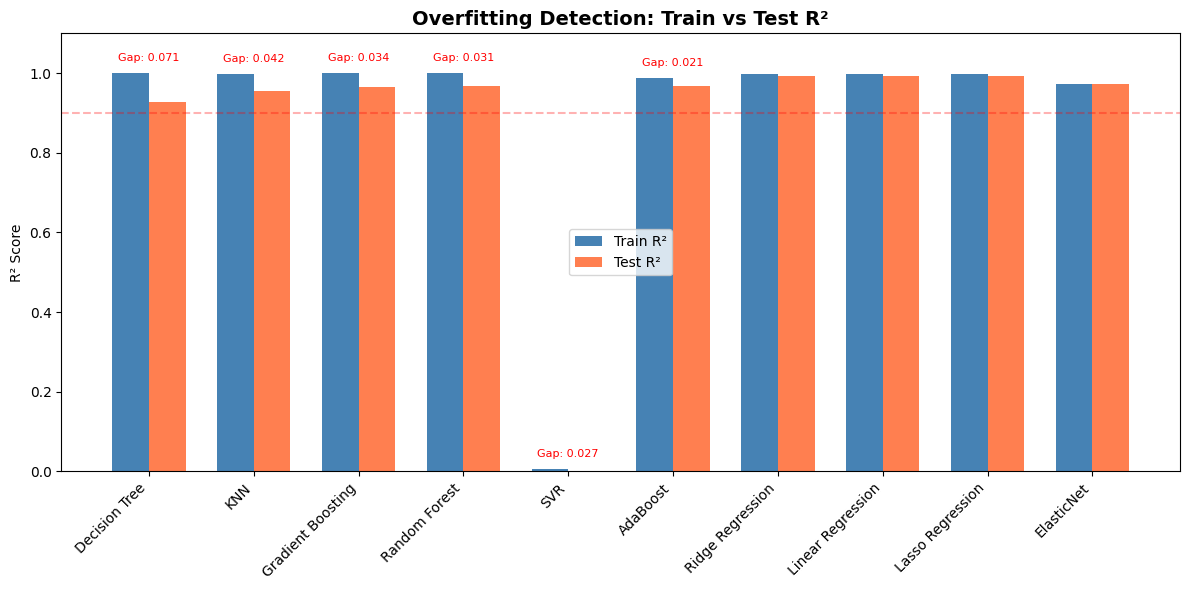

In [8]:
# ============================================================================
# OVERFITTING DETECTION: Train vs Test Score Comparison
# ============================================================================

print("\n" + "="*70)
print("OVERFITTING DETECTION: Train vs Test R² Comparison")
print("="*70)

overfitting_analysis = []

for name, model in models.items():
    # Get training score
    y_train_pred = model.predict(X_train_final_scaled)
    train_r2 = r2_score(y_train_final, y_train_pred)
    train_mae = mean_absolute_error(y_train_final, y_train_pred)
    
    # Get test score (already computed)
    test_r2 = results[name]['R2_mean']
    test_mae = results[name]['MAE_mean']
    
    # Calculate gap
    r2_gap = train_r2 - test_r2
    
    # Determine overfitting status
    if r2_gap > 0.05:
        status = "🔴 OVERFITTING"
    elif r2_gap > 0.02:
        status = "🟡 SLIGHT OVERFITTING"
    else:
        status = "🟢 GOOD FIT"
    
    overfitting_analysis.append({
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Gap': r2_gap,
        'Status': status
    })

# Create DataFrame and display
overfit_df = pd.DataFrame(overfitting_analysis)
overfit_df = overfit_df.sort_values('Gap', ascending=False)

print(f"\n{'Model':<20} {'Train R²':>10} {'Test R²':>10} {'Gap':>10} {'Status':<20}")
print("-"*75)
for _, row in overfit_df.iterrows():
    print(f"{row['Model']:<20} {row['Train R²']:>10.4f} {row['Test R²']:>10.4f} {row['Gap']:>+10.4f} {row['Status']:<20}")

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(overfit_df))
width = 0.35

bars1 = ax.bar(x - width/2, overfit_df['Train R²'], width, label='Train R²', color='steelblue')
bars2 = ax.bar(x + width/2, overfit_df['Test R²'], width, label='Test R²', color='coral')

ax.set_ylabel('R² Score')
ax.set_title('Overfitting Detection: Train vs Test R²', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(overfit_df['Model'], rotation=45, ha='right')
ax.legend()
ax.set_ylim([0, 1.1])
ax.axhline(y=0.9, color='red', linestyle='--', alpha=0.3)

# Add gap annotations
for i, (_, row) in enumerate(overfit_df.iterrows()):
    if row['Gap'] > 0.02:
        ax.annotate(f"Gap: {row['Gap']:.3f}", (i, max(row['Train R²'], row['Test R²']) + 0.03),
                   ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.savefig('overfitting_detection.png', dpi=300, bbox_inches='tight')
plt.show()


TRAINING LSTM MODEL
LSTM Input Shape: (3424, 3, 11)
  - Samples: 3424
  - Timesteps: 3
  - Features: 11


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 3, 128)         │        71,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,201 (481.25 KB)

 Trainable params: 123,201 (481.25 KB)

 Non-trainable params: 0 (0.00 B)


Training LSTM...
Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 590357.6250 - mae: 216.5848 - val_loss: 1246326.1250 - val_mae: 271.3584
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 569518.3750 - mae: 214.5081 - val_loss: 1218324.3750 - val_mae: 283.9154
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 554438.5000 - mae: 237.9870 - val_loss: 1201603.5000 - val_mae: 308.0894
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 548054.4375 - mae: 262.0970 - val_loss: 1193464.8750 - val_mae: 326.2263
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 545098.7500 - mae: 274.9454 - val_loss: 1189706.8750 - val_mae: 335.5922
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 544437.4375 - mae: 276.1090 - val_loss: 1184987.8750 - val_mae: 331.6531
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 542775.3750 - mae: 271.5386 - val_loss: 1183273.6250 - val_mae: 344.6777
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

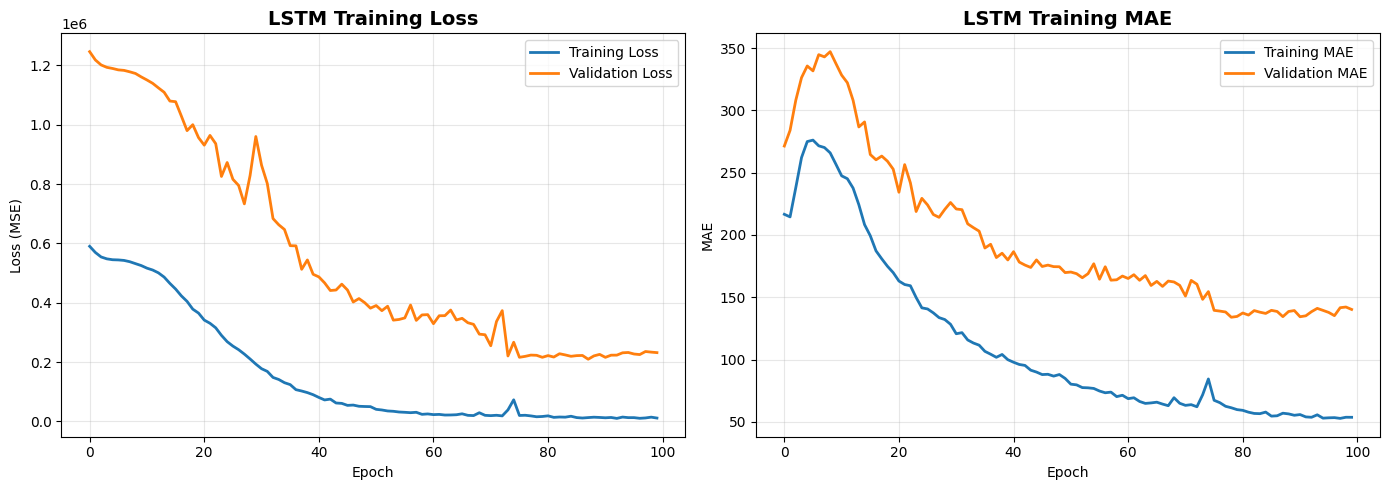

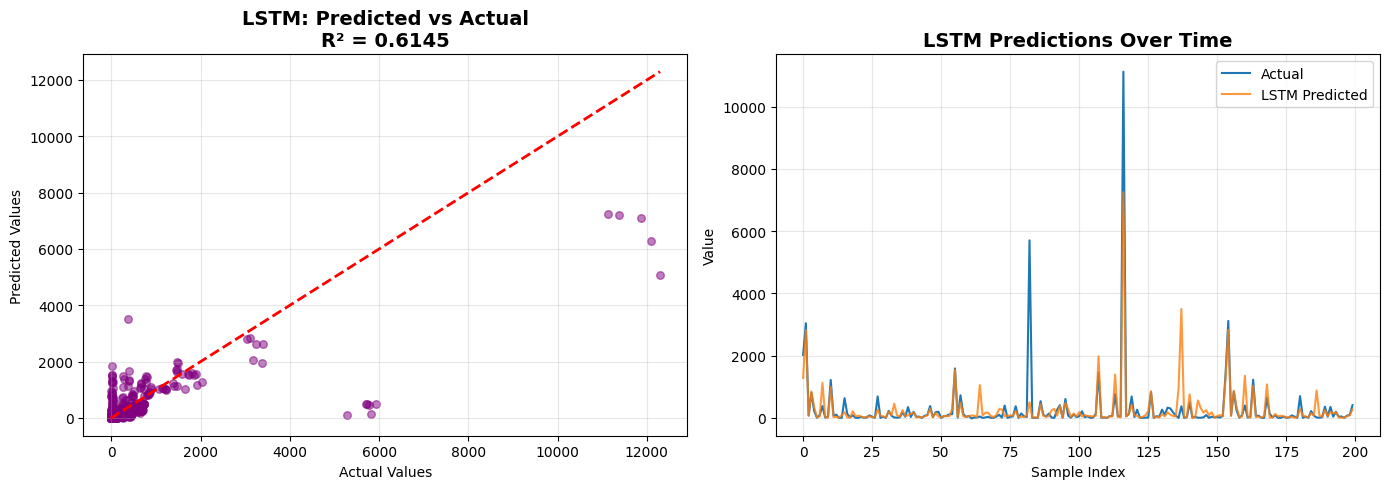


UPDATED MODEL COMPARISON (Including LSTM)


KeyError: 'MAE'

In [10]:
# ============================================================================
# LSTM MODEL FOR TIME SERIES PREDICTION
# ============================================================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

print("\n" + "="*70)
print("TRAINING LSTM MODEL")
print("="*70)

# ============================================================================
# STEP 1: Prepare data for LSTM (needs 3D input: samples, timesteps, features)
# ============================================================================

def create_sequences(X, y, timesteps=3):
    """Create sequences for LSTM input"""
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:(i + timesteps)])
        ys.append(y[i + timesteps])
    return np.array(Xs), np.array(ys)

# Number of time steps to look back
TIMESTEPS = 3

# Create sequences from scaled data
X_train_seq, y_train_seq = create_sequences(X_train_final_scaled, y_train_final, TIMESTEPS)
X_test_seq, y_test_seq = create_sequences(X_test_final_scaled, y_test_final, TIMESTEPS)

print(f"LSTM Input Shape: {X_train_seq.shape}")
print(f"  - Samples: {X_train_seq.shape[0]}")
print(f"  - Timesteps: {X_train_seq.shape[1]}")
print(f"  - Features: {X_train_seq.shape[2]}")

# ============================================================================
# STEP 2: Build LSTM Model
# ============================================================================

lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(TIMESTEPS, X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

lstm_model.summary()

# ============================================================================
# STEP 3: Train LSTM Model
# ============================================================================

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

print("\nTraining LSTM...")
history = lstm_model.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# ============================================================================
# STEP 4: Evaluate LSTM Model
# ============================================================================

lstm_pred = lstm_model.predict(X_test_seq, verbose=0).flatten()

lstm_mae = mean_absolute_error(y_test_seq, lstm_pred)
lstm_rmse = np.sqrt(mean_squared_error(y_test_seq, lstm_pred))
lstm_r2 = r2_score(y_test_seq, lstm_pred)
lstm_mape = np.mean(np.abs((y_test_seq - lstm_pred) / y_test_seq)) * 100

# Add to results
results['LSTM'] = {
    'MAE': lstm_mae,
    'RMSE': lstm_rmse,
    'R2': lstm_r2,
    'MAPE': lstm_mape,
    'predictions': lstm_pred,
    'model': lstm_model,
    'history': history.history
}

print(f"\nLSTM Results:")
print(f"MAE: {lstm_mae:,.2f}")
print(f"RMSE: {lstm_rmse:,.2f}")
print(f"R² Score: {lstm_r2:.4f}")
print(f"MAPE: {lstm_mape:.2f}%")

# ============================================================================
# STEP 5: LSTM Training History Visualization
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss Plot
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('LSTM Training Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE Plot
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_title('LSTM Training MAE', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lstm_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEP 6: LSTM Predictions vs Actual
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(y_test_seq, lstm_pred, alpha=0.5, s=30, c='purple')
axes[0].plot([y_test_seq.min(), y_test_seq.max()], 
             [y_test_seq.min(), y_test_seq.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'LSTM: Predicted vs Actual\nR² = {lstm_r2:.4f}', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Time series plot (sample)
sample_size = min(200, len(y_test_seq))
axes[1].plot(range(sample_size), y_test_seq[:sample_size], label='Actual', linewidth=1.5)
axes[1].plot(range(sample_size), lstm_pred[:sample_size], label='LSTM Predicted', linewidth=1.5, alpha=0.8)
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Value')
axes[1].set_title('LSTM Predictions Over Time', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lstm_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEP 7: Updated Results Summary (Including LSTM)
# ============================================================================

print("\n" + "="*70)
print("UPDATED MODEL COMPARISON (Including LSTM)")
print("="*70)

results_df_updated = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [results[m]['MAE'] for m in results],
    'RMSE': [results[m]['RMSE'] for m in results],
    'R² Score': [results[m]['R2'] for m in results],
    'MAPE (%)': [results[m]['MAPE'] for m in results]
}).sort_values('R² Score', ascending=False)

print(results_df_updated.to_string(index=False))

# Find best model
best_model = results_df_updated.iloc[0]['Model']
print(f"\nBest Model: {best_model}")
print(f"   R² Score: {results[best_model]['R2']:.4f}")